In [1]:
import os

In [2]:
Root = 'C:\\Users\\keshav malhotra\\speech data'

os.chdir(Root)

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is 0675-220C

 Directory of C:\Users\keshav malhotra\speech data

07-09-2023  18:11    <DIR>          .
07-09-2023  15:29    <DIR>          ..
04-09-2023  20:31    <DIR>          Actor_01
04-09-2023  20:31    <DIR>          Actor_02
04-09-2023  20:31    <DIR>          Actor_03
04-09-2023  20:31    <DIR>          Actor_04
04-09-2023  20:31    <DIR>          Actor_05
04-09-2023  20:31    <DIR>          Actor_06
04-09-2023  20:31    <DIR>          Actor_07
04-09-2023  20:31    <DIR>          Actor_08
04-09-2023  20:31    <DIR>          Actor_09
04-09-2023  20:31    <DIR>          Actor_10
04-09-2023  20:31    <DIR>          Actor_11
04-09-2023  20:32    <DIR>          Actor_12
04-09-2023  20:32    <DIR>          Actor_13
04-09-2023  20:32    <DIR>          Actor_14
04-09-2023  20:32    <DIR>          Actor_15
04-09-2023  20:32    <DIR>          Actor_16
04-09-2023  20:32    <DIR>          Actor_17
04-09-2023  20:32    <DIR>          Actor_18


In [4]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [5]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [6]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [7]:
# Fix the extract_feature function
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)  # Use the 'y' parameter for melspectrogram
            result = np.hstack((result, mel))
    return result



In [8]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\keshav malhotra\\speech data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)



In [9]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [10]:
x_train

array([[-5.18500488e+02,  5.00585785e+01, -1.14344206e+01, ...,
         4.87676880e-05,  3.57281860e-05,  2.55956420e-05],
       [-6.42891479e+02,  7.67089691e+01,  2.80970955e+00, ...,
         4.64334062e-06,  2.52473501e-06,  1.17446143e-06],
       [-6.24773193e+02,  6.18993988e+01,  1.61996651e+01, ...,
         3.24165267e-05,  3.35849836e-05,  1.60543805e-05],
       ...,
       [-5.50096191e+02,  1.70297680e+01, -1.14575634e+01, ...,
         1.51764631e-04,  1.16828531e-04,  8.47479314e-05],
       [-5.55357605e+02,  4.71569710e+01,  1.10750732e+01, ...,
         1.61086471e-04,  1.04962463e-04,  6.52811723e-05],
       [-5.04816345e+02,  3.53618660e+01, -1.43495789e+01, ...,
         6.08151546e-04,  5.55269769e-04,  4.47782222e-04]])

In [11]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [12]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [13]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [14]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [15]:
#Predict for the test set
y_pred=model.predict(x_test)

In [16]:
y_pred

array(['happy', 'calm', 'disgust', 'happy', 'disgust', 'calm', 'calm',
       'disgust', 'calm', 'disgust', 'happy', 'calm', 'happy', 'happy',
       'disgust', 'happy', 'calm', 'disgust', 'disgust', 'calm',
       'disgust', 'disgust', 'disgust', 'calm', 'happy', 'happy', 'calm',
       'happy', 'calm', 'calm', 'happy', 'disgust', 'happy', 'calm',
       'happy', 'calm', 'calm', 'fearful', 'calm', 'disgust', 'happy',
       'calm', 'calm', 'calm', 'disgust', 'disgust', 'disgust', 'calm',
       'calm', 'happy', 'fearful', 'fearful', 'fearful', 'happy',
       'disgust', 'happy', 'calm', 'happy', 'calm', 'calm', 'disgust',
       'calm', 'disgust', 'calm', 'disgust', 'calm', 'calm', 'disgust',
       'disgust', 'happy', 'fearful', 'fearful', 'fearful', 'fearful',
       'fearful', 'disgust', 'fearful', 'happy', 'calm', 'fearful',
       'calm', 'calm', 'fearful', 'calm', 'disgust', 'calm', 'disgust',
       'fearful', 'happy', 'disgust', 'disgust', 'fearful', 'calm',
       'happy', 'd

In [17]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.94%


In [18]:
from sklearn.metrics import accuracy_score, f1_score


In [19]:
f1_score(y_test, y_pred,average=None)

array([0.72164948, 0.59770115, 0.65454545, 0.60869565])

In [20]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,calm
2,happy,disgust
3,happy,happy
4,disgust,disgust
5,calm,calm
6,happy,calm
7,happy,disgust
8,disgust,calm
9,happy,disgust


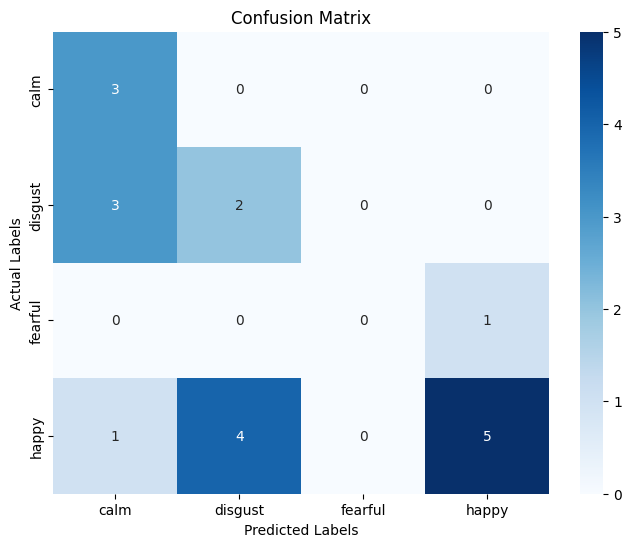

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_labels), yticklabels=np.unique(actual_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [21]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [22]:
import pyAudioAnalysis
import pyaudio
import wave
from pyAudioAnalysis import audioSegmentation






C:\Users\keshav malhotra\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyAudioAnalysis\..\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [40]:


# Constants for audio recording
FORMAT = pyaudio.paInt16  # Format for audio samples (16-bit PCM)
CHANNELS = 1  # Number of audio channels (1 for mono, 2 for stereo)
RATE = 44100  # Sample rate (samples per second)
CHUNK = 1024  # Number of frames per buffer
RECORD_SECONDS = 10  # Duration of recording in seconds
OUTPUT_FILE = "sample_audio.wav"  # Output WAV file name

# Initialize the audio stream
audio = pyaudio.PyAudio()

# Open a microphone stream
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

print("Recording...")

frames = []

# Record audio from the microphone
for _ in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording finished.")

# Stop and close the microphone stream
stream.stop_stream()
stream.close()

# Terminate the audio interface
audio.terminate()

# Save the recorded audio to a WAV file
with wave.open(OUTPUT_FILE, 'wb') as wf:
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))

print(f"Audio saved to {OUTPUT_FILE}")


Recording...
Recording finished.
Audio saved to sample_audio.wav


In [41]:

# Load the trained machine learning model
filename = 'modelForPrediction1.sav'
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Define the file path of the recorded audio
audio_file_path = "sample_audio.wav"

# Extract features from the recorded audio file
feature = extract_feature(audio_file_path, mfcc=True, chroma=True, mel=True)

# Check if feature extraction was successful
if feature is not None:
    feature = feature.reshape(1, -1)

    # Make predictions using the loaded model
    prediction = loaded_model.predict(feature)

    # Print the predicted emotion or classification result
    print(f"Predicted emotion or result: {prediction[0]}")
else:
    print("Feature extraction failed.")



Predicted emotion or result: disgust
